## **1. Introduction and Context**

This notebook performs an Exploratory Data Analysis (EDA), a crucial step for understanding the dataset before modeling. The primary focus is a Classification Problem, where the goal is to predict an individual's physical performance.

- **Data Source:** https://www.kaggle.com/datasets/kukuroo3/body-performance-data
- **Objectives:** Data preparation, pattern identification, feature quality assessment, and target variable distribution analysis.


## **2. Dataset Structure and Justification**

The dataset consists of physical fitness measurements and demographic characteristics used to classify an individual into a performance tier.

- **Target Variable (class):** The *class* column (A, B, C, D) is the variable we aim to predict.

  - *A*: Best performance

  - *D*: Worst performance

- **Predictive Variables (*Features*):**

  - **Demographics**: *age*, *gender*

  - **Body Measurements**: *height_cm*, *weight_kg*, *body fat_%*

  - **Health Metrics**: *diastolic*, *systolic* (Blood Pressure)

  - **Physical Tests**: *gripForce*, *sit and bend forward_cm*, *sit-ups counts*, *broad jump_cm*

- **Classification Context:** For classification models, the EDA focuses on:

  - **Class Distribution:** Is the dataset balanced?

  - **Class Separation:** Do numerical features have distinct distributions for each class?

  - **Feature-Class Relationship:** Which features are the most discriminatory?

#### **EDA Goals**

1. Assess data quality and structure (data types, missing values).

2. Analyze the target variable balance.

3. Identify the most discriminatory features (those that best separate the classes).

## **3. Loading, Structure, and Descriptive Statistics**

This section loads the dataset and performs an initial inspection to verify dimensions, data types, and the presence of missing values.

In [12]:
# Import essential libraries for manipulation, visualization, and calculation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "../data/raw/bodyPerformance.csv" # Define file path
df = pd.read_csv(dataset_path) # Load CSV into a Pandas DataFrame

# Initial Inspection
print("Dataset Dimensions:", df.shape) # (rows, columns)

print("\nData Types:") 
print(df.dtypes)

print("\nMissing Values:")
print(df.isna().sum())

print("\nDescriptive Statistics:")
display(df.describe()) # 'display' looks better in notebooks than 'print'

Dataset Dimensions: (13393, 12)

Data Types:
age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

Missing Values:
age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Descriptive Statistics:


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


#### **Interpretation of Results**

- **Dimensions:** The dataset contains 13,393 observations and 12 columns.

- **Data Quality:** The missing value count (``df.isna().sum()``) indicates the dataset is clean, with no missing values in any column.

- **Statistics:** The summary statistics provide insights into the range and scale of numerical features (e.g., age ranges, weight distribution).

## **4. Target Variable Analysis (``class``)**

Before building any model, it is crucial to understand the distribution of the variable we want to predict to check for imbalance.

Class Counts:
class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64


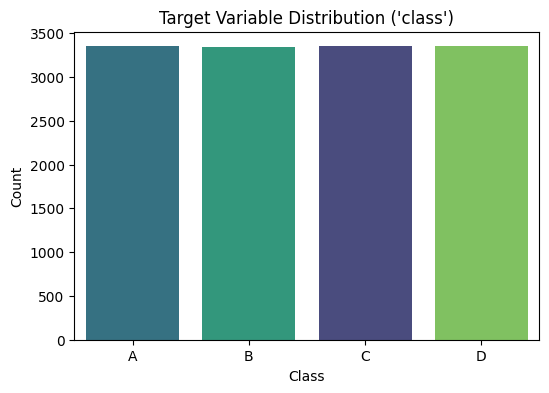

In [13]:
class_counts = df['class'].value_counts() # Count occurrences per class

print("Class Counts:")
print(class_counts)

# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, order=class_counts.index.sort_values(), hue='class', palette='viridis', legend=False)
plt.title("Target Variable Distribution ('class')")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### **Interpretation**

The visual analysis confirms that the dataset is **perfectly balanced**:

- All four classes (A, B, C, D) have extremely similar counts (approx. 3,348 instances each).

- The maximum difference between classes is only ~2 records.

- **Advantage**: This eliminates the need for complex data balancing techniques (like SMOTE or Undersampling) during the training phase.

## **5. Bivariate Analysis: Feature Discriminatory Power**

Here, we explore how numerical features are distributed across classes. Boxplots are the ideal tool to evaluate if a predictor can effectively distinguish between performance tiers.

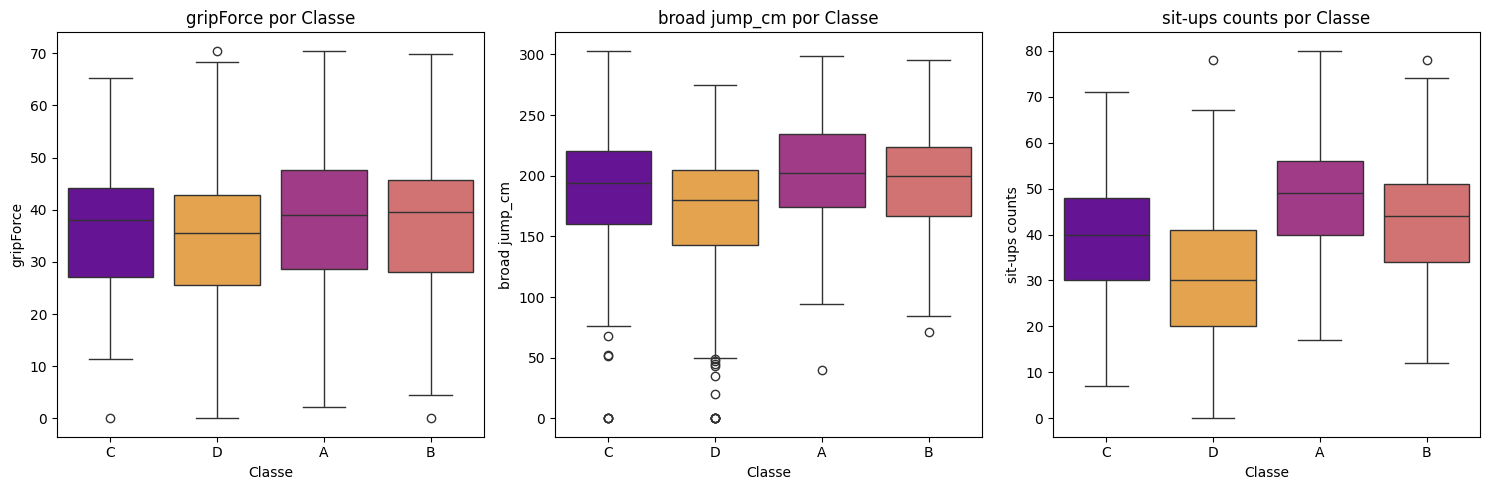

In [14]:
key_features = ['gripForce', 'broad jump_cm', 'sit-ups counts'] # Lista de features de desempenho físico a serem analisadas

plt.figure(figsize=(15, 5))
for i, feature in enumerate(key_features):
    plt.subplot(1, 3, i + 1)

    sns.boxplot(x='class', y=feature, data=df, order=class_counts.index, palette='plasma', hue='class', legend=False)
    plt.title(f'{feature} por Classe')
    plt.xlabel('Classe')
    plt.ylabel(feature)

plt.tight_layout()
plt.show() 

#### **Interpretation (Boxplots)**

These visualizations assess the discriminatory power of key physical features:

1. **Discriminatory Power:** There is a clear separation in distributions (quartiles and medians), particularly distinguishing Class A from Class D.

2. **Ordinal Relationship:**

    - **Classes A and B**: Cluster around higher values for physical metrics, indicating higher fitness.

    - **Classes C and D**: Cluster around lower values.

    - The expected relationship (**A > B > C > D**) is clearly preserved in the data.

3. **Outliers**: While some outliers exist (e.g., low sit-up counts in Class C), the strong separation of the interquartile ranges suggests these features are robust predictors.

## **6. Categorical Variable Analysis (``gender``)**

We analyze the impact of gender on the distribution of performance classes.

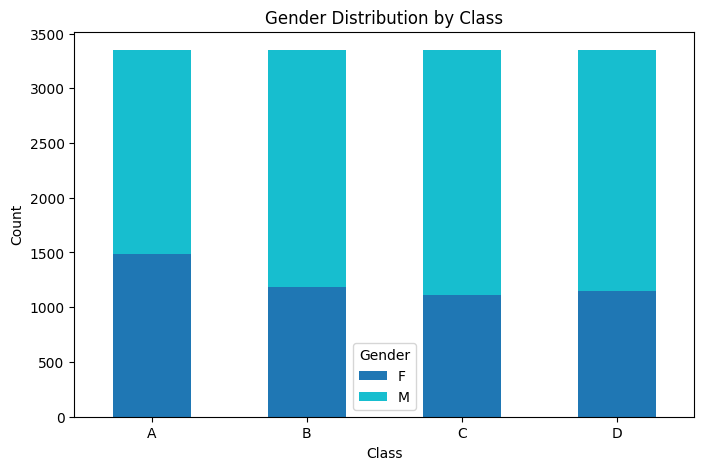

In [15]:
# Create a pivot table to count gender occurrences per class
gender_class_pivot = df.groupby(['class', 'gender']).size().unstack(fill_value=0)

# Visualization
gender_class_pivot.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='tab10')
plt.title("Gender Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

#### **Interpretation**

The stacked bar chart reveals the gender composition within each fitness class:

- **Uniformity**: The Male/Female ratio is nearly **50/50 across all classes**.

- **Conclusion**: Gender is evenly distributed, meaning the dataset does not suffer from gender bias regarding performance classification.



### **6.1 - Feature Engineering (BMI)**

We calculate the Body Mass Index (BMI) using weight and height ($BMI = weight / height^2$). This creates a single physiological metric from two features, potentially improving model performance.

In [16]:
# Calculate BMI (Height converted from cm to meters)
df["BMI"] = df["weight_kg"] / ((df["height_cm"] / 100) ** 2)
df["BMI"] = df["BMI"].round(2)

print("Feature 'BMI' created successfully.")
display(df[["height_cm", "weight_kg", "BMI"]].head())

Feature 'BMI' created successfully.


,height_cm,weight_kg,BMI
0,172.3,75.24,25.34
1,165.0,55.80,20.50
2,179.6,78.00,24.18
3,174.5,71.10,23.35
4,173.8,67.70,22.41


## **7. Numerical Correlation Matrix**

The correlation matrix measures linear relationships between pairs of numerical features.

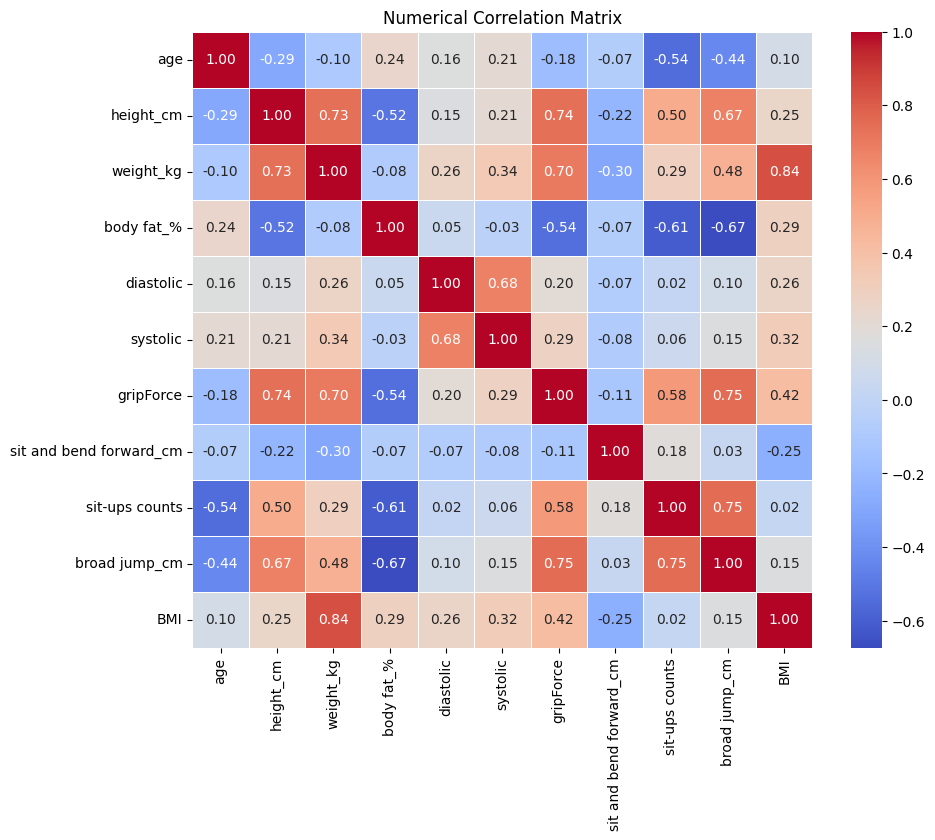

In [17]:
# Create a new DataFrame with only numerical columns (drop original categorical targets)
numeric_df = df.drop(columns=['gender', 'class']) 

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Numerical Correlation Matrix")
plt.show()

#### **Interpretation**

Values close to +1.0 indicate strong positive correlation, while -1.0 indicate strong negative correlation.

1. **Strong Positive Correlations:**

    - sit-ups counts vs. broad jump_cm (**0.75**): Core strength relates to explosive leg power.

    - height_cm vs. weight_kg (**0.73**): Taller individuals tend to weigh more.

2. **Strong Negative Correlations:**

    - body fat_% vs. sit-ups / broad jump (**-0.61 to -0.67**): Higher body fat percentage is strongly associated with lower performance in physical tests.

    - age vs. physical metrics: Performance generally declines with age.

3. **Low Correlation:**

    - Blood pressure metrics (diastolic/systolic) have very low correlation with physical performance tests, suggesting they are independent factors in this context.

### **7.1 – Multivariate Analysis (Pairplot)**

A visual overview of relationships between variables, colored by class.

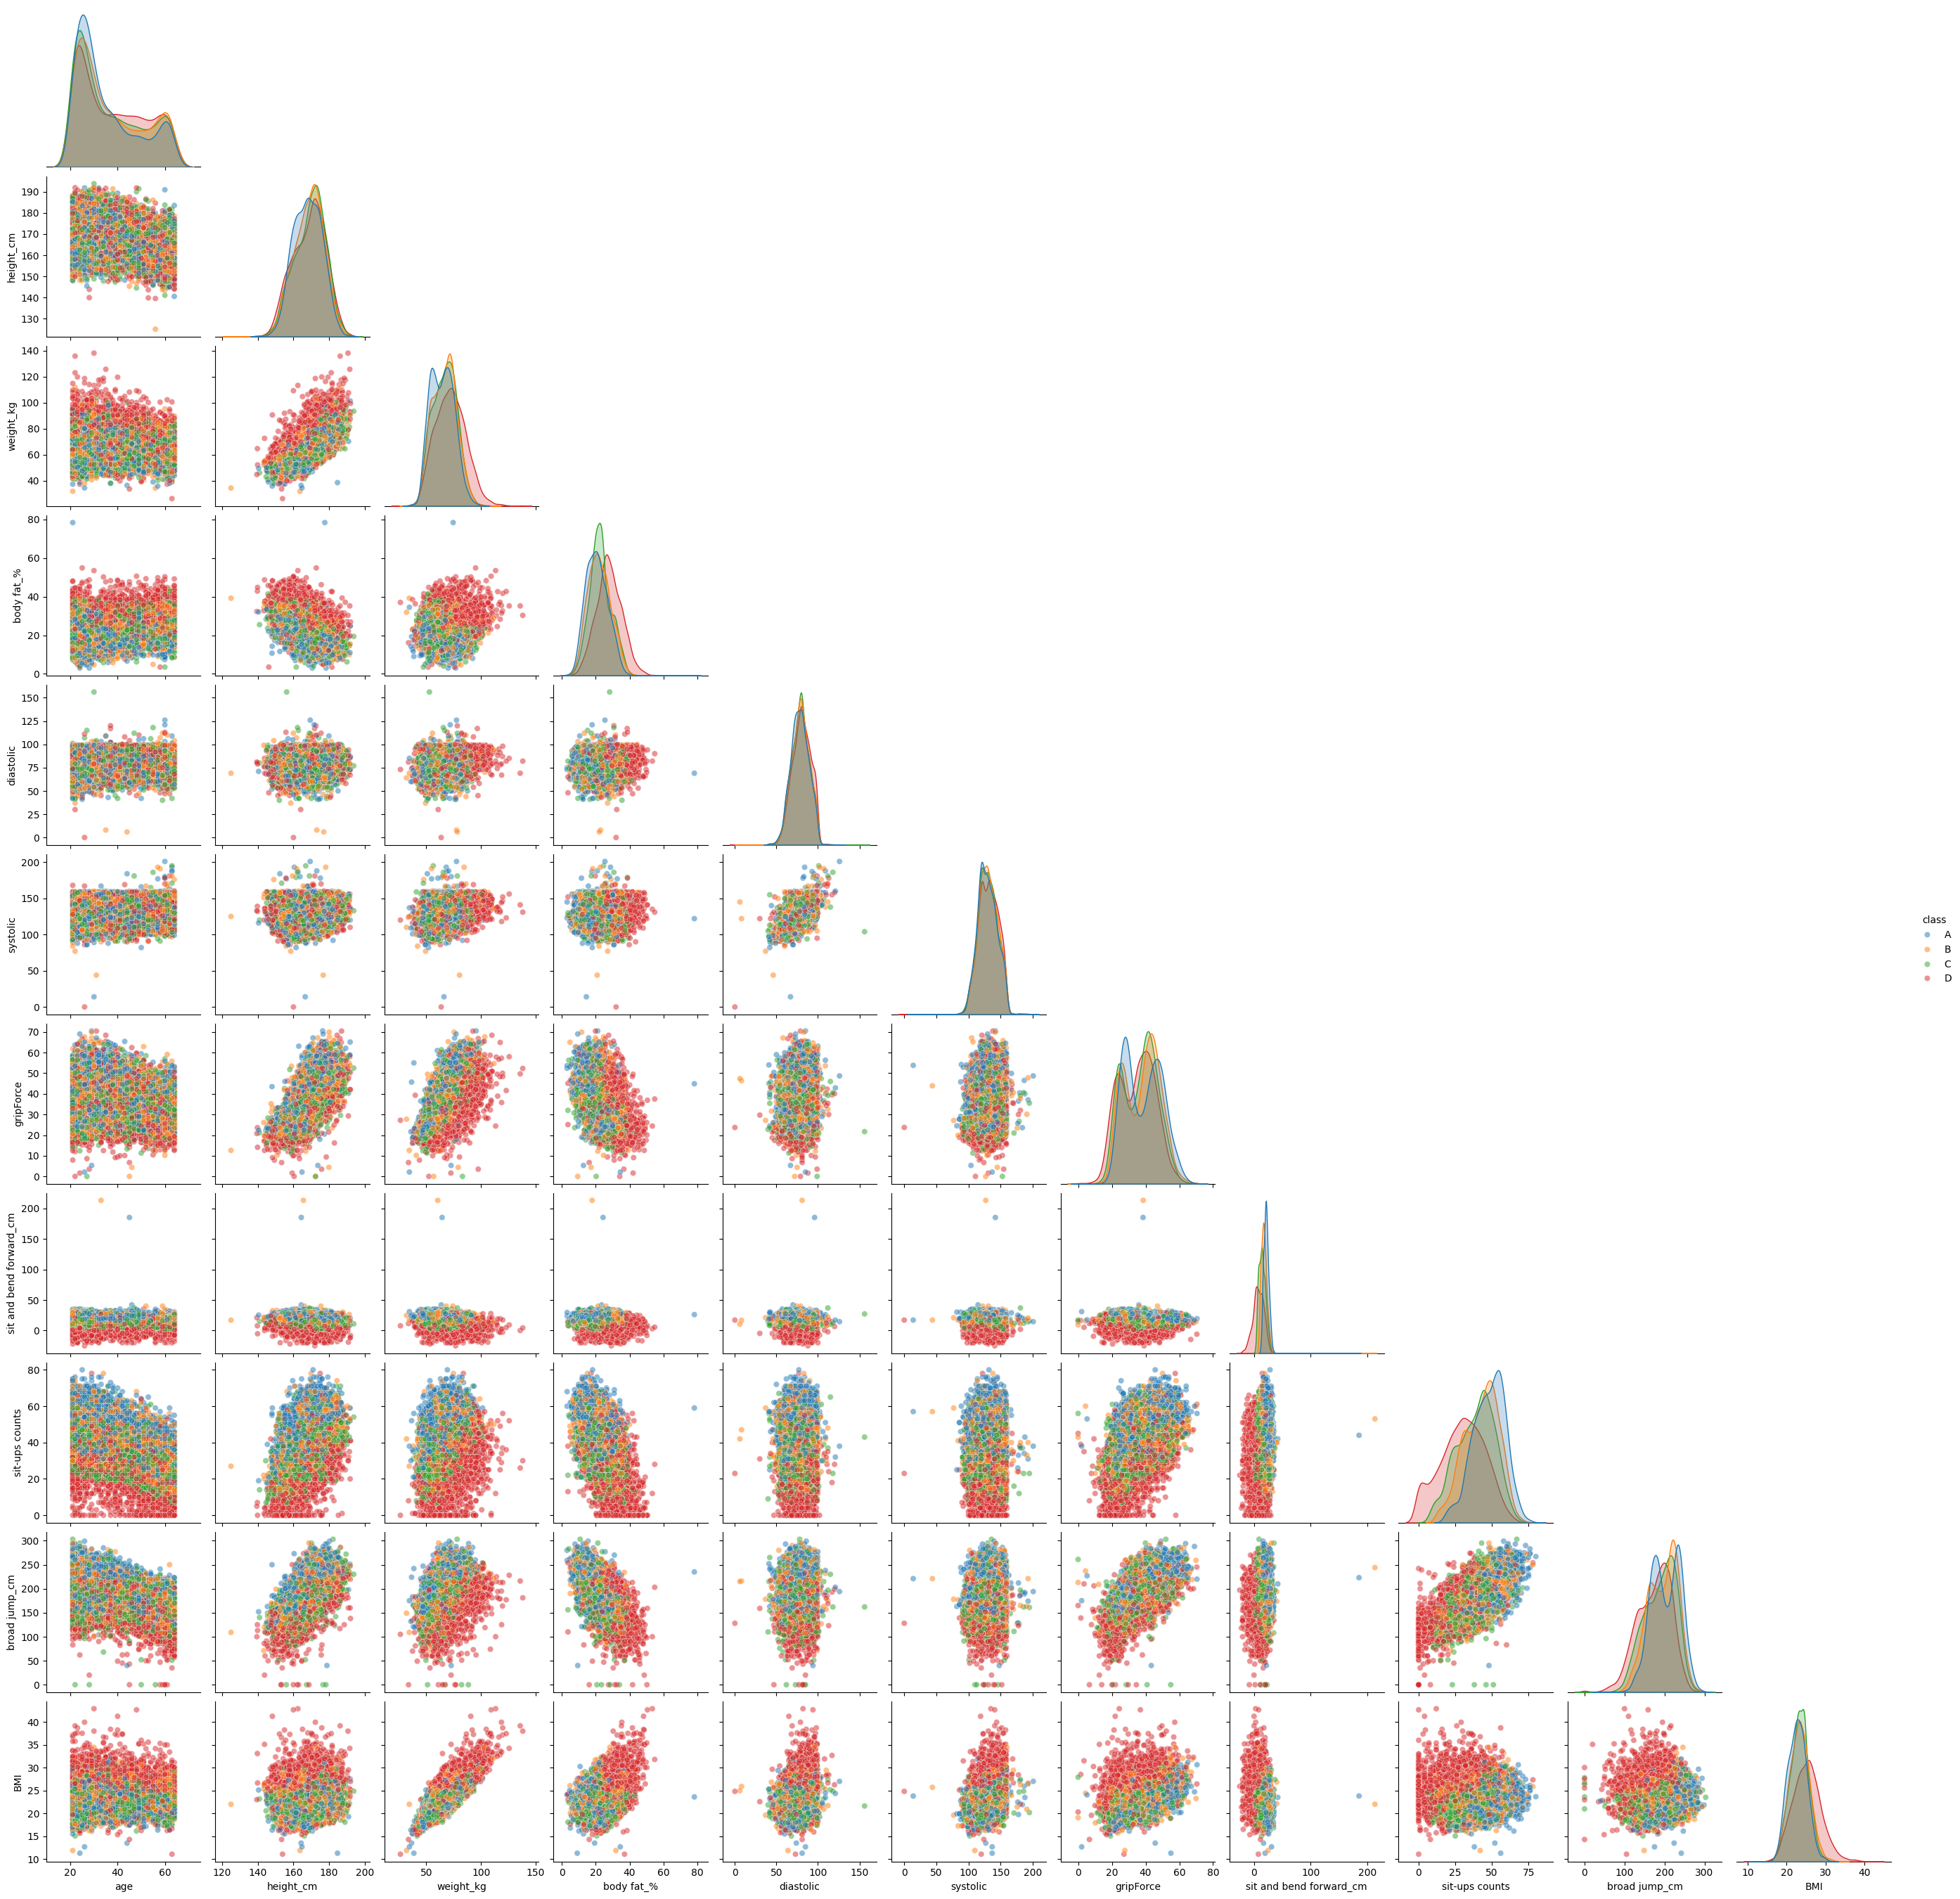

In [18]:
# Corner=True hides the redundant upper triangle to make it cleaner
sns.pairplot(df, vars=numeric_df.columns, hue='class', hue_order=['A','B','C','D'], corner=True, plot_kws={'alpha':0.5})
plt.show()

## **8. Final Preparation and Data Export**

Final steps include encoding categorical variables and mapping the ordinal target variable for algorithmic compatibility.

#### **8.1. Categorical Encoding**

The ``gender`` column is converted using One-Hot Encoding, creating an ``is_male`` flag.

In [19]:
# One-Hot Encoding for 'gender'
df_encoded = pd.get_dummies(df, columns=['gender'], drop_first=True) 

# Rename column for clarity (assuming 'gender_M' is created)
if 'gender_M' in df_encoded.columns:
    df_encoded.rename(columns={'gender_M': 'is_male'}, inplace=True)
elif 'gender_F' in df_encoded.columns:
    df_encoded.rename(columns={'gender_F': 'is_female'}, inplace=True)

# Force boolean to integer (0/1) if necessary
if df_encoded['is_male'].dtype == 'bool':
    df_encoded['is_male'] = df_encoded['is_male'].astype(int)

print("Preview of Features:")
display(df_encoded.head())

Preview of Features:


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,BMI,is_male
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.34,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.50,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.18,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.35,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.41,1


#### **8.2. Target Label Encoding**

Since the classes (A, B, C, D) have an ordinal relationship (Ranked), we map them to integers (0, 1, 2, 3).

In [20]:
class_mapping = {
    'A': 0,  # Best Performance
    'B': 1,
    'C': 2,
    'D': 3   # Worst Performance
}

# Apply mapping
df_encoded['class'] = df_encoded['class'].map(class_mapping).astype(int)

print(f"\nClass Mapping applied: {class_mapping}")
print("Target variable preview:")
print(df_encoded['class'].value_counts())


Class Mapping applied: {'A': 0, 'B': 1, 'C': 2, 'D': 3}
Target variable preview:
class
2    3349
3    3349
0    3348
1    3347
Name: count, dtype: int64


#### **8.3. Export**

We save the processed DataFrame for the modeling phase.

In [21]:
output_path = "../data/processed/prepared_classification.csv"

# Export to CSV without the index
df_encoded.to_csv(output_path, index=False)

print(f"\nFile successfully exported to: {output_path}")
print("Final Dataset Shape:", df_encoded.shape)


File successfully exported to: ../data/processed/prepared_classification.csv
Final Dataset Shape: (13393, 13)


#### **Export Conclusion**

The dataset ``prepared_classification.csv`` is now ready. It contains:

1. **Feature Engineering**: Added BMI.

2. **Encoding**: Gender is binary, Class is numeric/ordinal.

3. **Cleanliness**: No missing values.

It is now the ideal starting point for training Classification algorithms (e.g., Logistic Regression, Random Forest, XGBoost).
